In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [237]:
# notebook parameters
input_dataset_path = 'data/heart.csv'

In [238]:
heart_df = pd.read_csv(input_dataset_path)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [239]:
# general dataset descriptors
print(f"Input dataset has {heart_df.shape[0]} rows and {heart_df.shape[1]} colums")
print(f"Input dataset consists of {heart_df.drop(columns=['target']).shape[1]} features and 1 target column")

print(f"Target values are: {heart_df['target'].unique()}")
print(f"Input dataset contains {heart_df[heart_df.duplicated()].shape[0]} duplicated rows and {heart_df[heart_df.duplicated()==False].shape[0]} unique rows")

Input dataset has 1025 rows and 14 colums
Input dataset consists of 13 features and 1 target column
Target values are: [0 1]
Input dataset contains 723 duplicated rows and 302 unique rows


In [240]:
# divide a heart failure dataset into features and target value sets
x = heart_df.drop(columns=['target'])
y = heart_df['target']

In [241]:
# Select training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    random_state=12, 
                                                    test_size=0.25)

print(f"Training dataset consists of {x_train.shape[0]} records")
print(f"Test dataset consists of {x_test.shape[0]} records")

Training dataset consists of 768 records
Test dataset consists of 257 records


In [242]:
# some models are sensitive for feature value scale differences
# StandardScaler is used to transform those values into rescaled format, without information loss
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

In [243]:
# Transform target data sets into binary matrix representation of the target values
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

### Decision Tree

In [244]:
dt_model = DecisionTreeClassifier(random_state=11, 
                                  criterion='entropy')

dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=11)

In [245]:
npr_dt_predictions = dt_model.predict(x_test)
print(f"Prediction accuracy for (non pruned) decision tree: {accuracy_score(y_test, npr_dt_predictions)}")

Prediction accuracy for (non pruned) decision tree: 1.0


[Text(0.4699292452830189, 0.95, 'x[2] <= -0.411\nentropy = 1.0\nsamples = 768\nvalue = [380, 388]'),
 Text(0.2641509433962264, 0.85, 'x[11] <= -0.269\nentropy = 0.788\nsamples = 382\nvalue = [292, 90]'),
 Text(0.16981132075471697, 0.75, 'x[12] <= 0.274\nentropy = 0.998\nsamples = 164\nvalue = [86, 78]'),
 Text(0.09433962264150944, 0.65, 'x[8] <= 0.32\nentropy = 0.824\nsamples = 93\nvalue = [24, 69]'),
 Text(0.03773584905660377, 0.55, 'x[0] <= 0.604\nentropy = 0.509\nsamples = 62\nvalue = [7, 55]'),
 Text(0.018867924528301886, 0.45, 'entropy = 0.0\nsamples = 41\nvalue = [0, 41]'),
 Text(0.05660377358490566, 0.45, 'x[0] <= 0.766\nentropy = 0.918\nsamples = 21\nvalue = [7, 14]'),
 Text(0.03773584905660377, 0.35, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.07547169811320754, 0.35, 'x[7] <= -2.211\nentropy = 0.672\nsamples = 17\nvalue = [3, 14]'),
 Text(0.05660377358490566, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.09433962264150944, 0.25, 'entropy = 0.0\nsampl

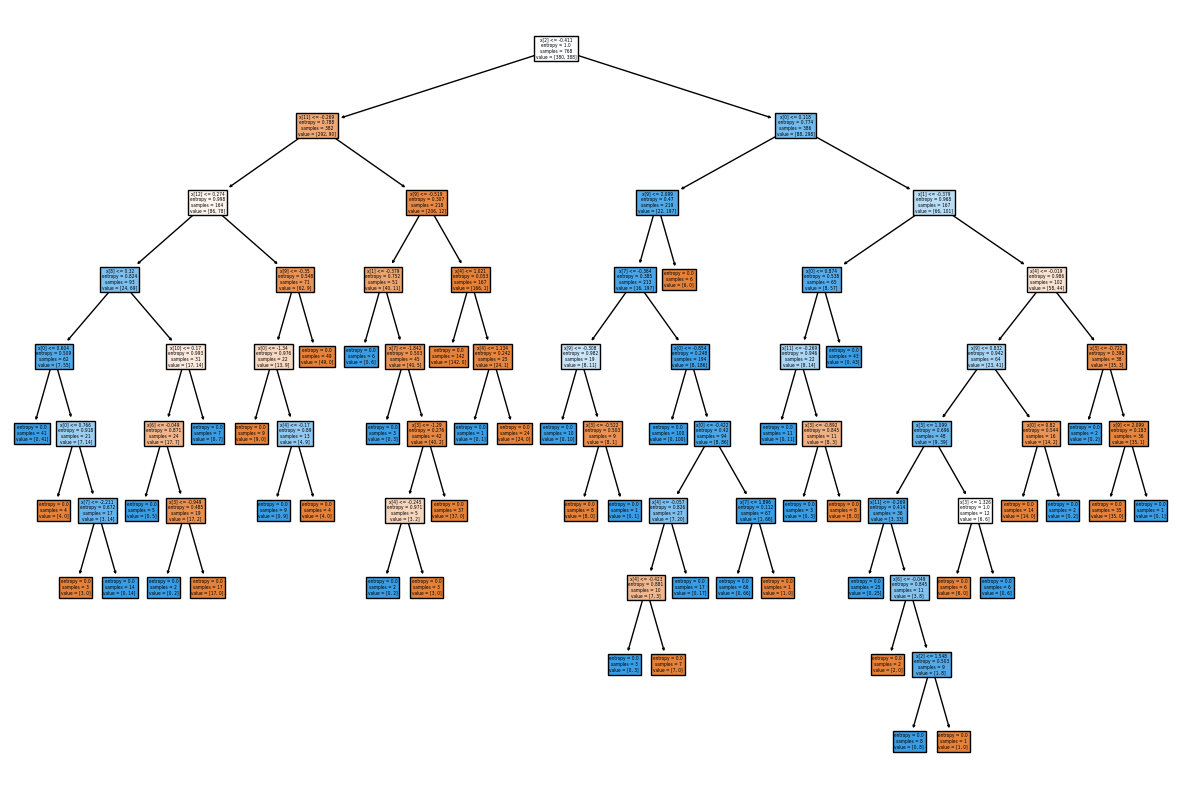

In [246]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model,filled=True)

### CNN model

In [247]:
cnn_model = Sequential()
cnn_model.add(Dense(256, 
                    input_dim=13, 
                    activation='relu'))
cnn_model.add(Dense(256, 
                    activation='relu'))
cnn_model.add(Dense(2, 
                    activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
print(f"CNN model summary: \n{cnn_model.summary()}")

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 256)               3584      
                                                                 
 dense_43 (Dense)            (None, 256)               65792     
                                                                 
 dense_44 (Dense)            (None, 2)                 514       
                                                                 
Total params: 69890 (273.01 KB)
Trainable params: 69890 (273.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
CNN model summary: 
None


In [248]:
cnn_model.fit(x_train, 
              y_cat_train, 
              epochs=10, 
              validation_data=(x_test, y_cat_test))

Epoch 1/10
24/24 [==============================] - 1s 13ms/step - loss: 0.4195 - accuracy: 0.8112 - val_loss: 0.3632 - val_accuracy: 0.8444
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 0.2984 - accuracy: 0.8854 - val_loss: 0.3276 - val_accuracy: 0.8638
Epoch 3/10
24/24 [==============================] - 0s 3ms/step - loss: 0.2478 - accuracy: 0.9036 - val_loss: 0.2808 - val_accuracy: 0.8794
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 0.2100 - accuracy: 0.9180 - val_loss: 0.2434 - val_accuracy: 0.9105
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 0.1840 - accuracy: 0.9414 - val_loss: 0.2136 - val_accuracy: 0.9339
Epoch 6/10
24/24 [==============================] - 0s 3ms/step - loss: 0.1430 - accuracy: 0.9570 - val_loss: 0.1643 - val_accuracy: 0.9377
Epoch 7/10
24/24 [==============================] - 0s 3ms/step - loss: 0.1178 - accuracy: 0.9596 - val_loss: 0.1598 - val_accuracy: 0.9416
Epoch 8/10
24/24 [=

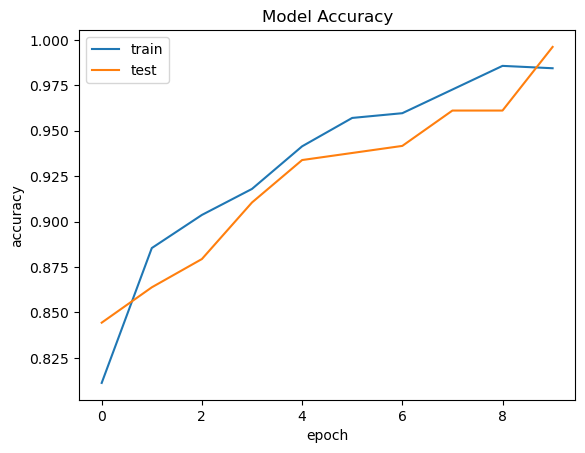

In [249]:
plt.plot(cnn_model.history.history['accuracy'])
plt.plot(cnn_model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

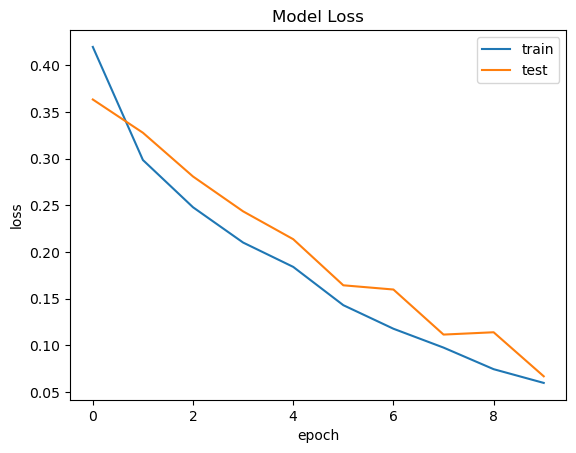

In [250]:
# Model Losss
plt.plot(cnn_model.history.history['loss'])
plt.plot(cnn_model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [251]:
print(f"CNN model evaluation after training: {cnn_model.evaluate(x_train, y_cat_train)}")
print (f"CNN model evaluation for test dataset: {cnn_model.evaluate(x_test, y_cat_test)}")

 1/24 [>.............................] - ETA: 0s - loss: 0.0330 - accuracy: 1.0000

24/24 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9922
CNN model evaluation after training: [0.04753783717751503, 0.9921875]
9/9 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9961
CNN model evaluation for test dataset: [0.06685981154441833, 0.9961089491844177]


In [252]:
# CNN model Heart Failure prediction for test dataset
cnn_prediction = cnn_model.predict(x_test)
prob_cnn_prediction = np.argmax(cnn_prediction, axis=1)

print('Results for CNN categorical model')
print(accuracy_score(y_test, prob_cnn_prediction))
print(classification_report(y_test, prob_cnn_prediction))

9/9 [==============================] - 0s 1ms/step
Results for CNN categorical model
0.9961089494163424
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       119
           1       0.99      1.00      1.00       138

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [253]:
# cnn_cm = confusion_matrix(y_test, cnn_prediction)
# ax = sns.heatmap(cnn_cm, annot=True, cmap="Blues")
# ax.set_xlabel('Predictions')
# ax.set_ylabel('Aktual data')
# plt.title('Confussion Matrix of CNN model')
# plt.show()